In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
pip install Keras-Applications

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.7/50.7 kB 2.6 MB/s eta 0:00:00


In [ ]:
import os
from keras.preprocessing.image import  ImageDataGenerator
from keras.layers import Dense,Flatten,GlobalAveragePooling2D,Input,Conv2D,MaxPooling2D,Dropout
from keras.models import Model,load_model,Sequential
from keras.applications.xception import  Xception
from keras.applications.vgg16 import VGG16
from keras.applications.vgg19 import VGG19
from keras.applications.inception_v3 import InceptionV3
from keras.applications.inception_resnet_v2 import InceptionResNetV2
from keras.applications.efficientnet import EfficientNetB7
from keras.applications.efficientnet_v2 import EfficientNetV2L
import keras.callbacks as kcallbacks
import keras
#from keras.preprocessing.image import load_img,img_to_array
from tensorflow.keras.utils import img_to_array
import math
import random
from keras.utils import plot_model
import matplotlib.pyplot as plt
import sklearn.metrics as metrics
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import sklearn.metrics as metrics
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
import shutil
from random import shuffle


In [ ]:

attacks_list = ['Fingerprinting', 'XSS', 'Backdoor', 'DDoS_UDP', 'DDoS_ICMP', 'DDoS_TCP', 'DDoS_HTTP', 'MITM', 'Normal', 'Password', 'Port_Scanning',
        'Uploading', 'SQL_injection', 'Vulnerability_scanner', 'Ransomware']




for name in attacks_list:

  # Set the paths for your original folder and the new train/test folders
  original_folder = f'/content/drive/MyDrive/Transfer_IDS_IIoT/Datasets/train/{name}'
  train_folder = f'/content/drive/MyDrive/Transfer_IDS_IIoT/Datasets/train_A/{name}/'
  test_folder = f'/content/drive/MyDrive/Transfer_IDS_IIoT/Datasets/test_A/{name}/'


  # Set the ratio for training and testing (80:20)
  train_ratio = 0.8

  # Get the list of all image files in the original folder

  image_files = os.listdir(original_folder)
  shuffle(image_files)  # Shuffle the list to randomize the order

  # Calculate the split index based on the ratio
  split_index = int(len(image_files) * train_ratio)

  # Divide the images into training and testing sets
  train_images = image_files[:split_index]
  test_images = image_files[split_index:]

  # Create the train and test folders if they don't exist
  os.makedirs(train_folder, exist_ok=True)
  os.makedirs(test_folder, exist_ok=True)

  # Move images to the train folder
  for image in train_images:
      src_path = os.path.join(original_folder, image)
      dest_path = os.path.join(train_folder, image)
      shutil.move(src_path, dest_path)

  # Move images to the test folder
  for image in test_images:
      src_path = os.path.join(original_folder, image)
      dest_path = os.path.join(test_folder, image)
      shutil.move(src_path, dest_path)

In [ ]:
#generate training and test images
TARGET_SIZE=(224,224)
INPUT_SIZE=(224,224,3)
BATCHSIZE= 32	#could try 128 or 32

#Normalization
train_datagen = ImageDataGenerator(rescale=1./255)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        '/content/drive/MyDrive/Transfer_IDS_IIoT/Datasets/train_A',
        target_size=TARGET_SIZE,
        batch_size=BATCHSIZE,
        class_mode='categorical')
validation_generator = test_datagen.flow_from_directory(
        '/content/drive/MyDrive/Transfer_IDS_IIoT/Datasets/test_A',
        target_size=TARGET_SIZE,
        batch_size=BATCHSIZE,
        class_mode='categorical')

Found 5380 images belonging to 15 classes.
Found 1352 images belonging to 15 classes.


In [ ]:
train_datagen

In [ ]:
INPUT_SIZE=(224,224,3)

Epoch 1/25
169/169 [==============================] - ETA: 0s - loss: 1.1235 - accuracy: 0.7424 
Epoch 1: val_accuracy improved from -inf to 0.82840, saving model to /content/drive/MyDrive/Transfer_IDS_IIoT/Trained_Models/generic_cnn.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


169/169 [==============================] - 2398s 14s/step - loss: 1.1235 - accuracy: 0.7424 - val_loss: 0.4808 - val_accuracy: 0.8284
Epoch 2/25
169/169 [==============================] - ETA: 0s - loss: 0.3601 - accuracy: 0.8730
Epoch 2: val_accuracy improved from 0.82840 to 0.88757, saving model to /content/drive/MyDrive/Transfer_IDS_IIoT/Trained_Models/generic_cnn.h5
169/169 [==============================] - 39s 227ms/step - loss: 0.3601 - accuracy: 0.8730 - val_loss: 0.3418 - val_accuracy: 0.8876
Epoch 3/25
169/169 [==============================] - ETA: 0s - loss: 0.2418 - accuracy: 0.9082
Epoch 3: val_accuracy improved from 0.88757 to 0.93047, saving model to /content/drive/MyDrive/Transfer_IDS_IIoT/Trained_Models/generic_cnn.h5
169/169 [==============================] - 38s 226ms/step - loss: 0.2418 - accuracy: 0.9082 - val_loss: 0.2951 - val_accuracy: 0.9305
Epoch 4/25
169/169 [==============================] - ETA: 0s - loss: 0.1903 - accuracy: 0.9210
Epoch 4: val_accuracy im

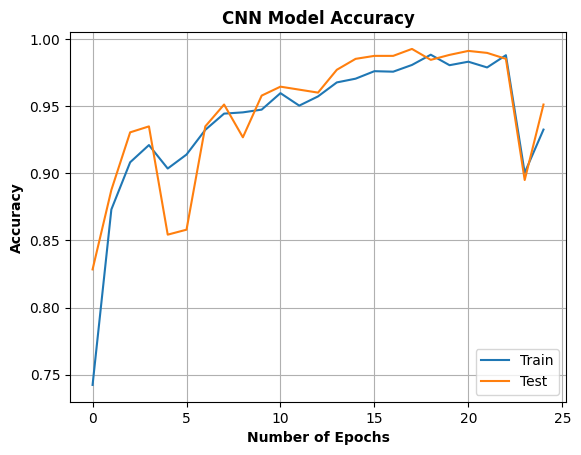

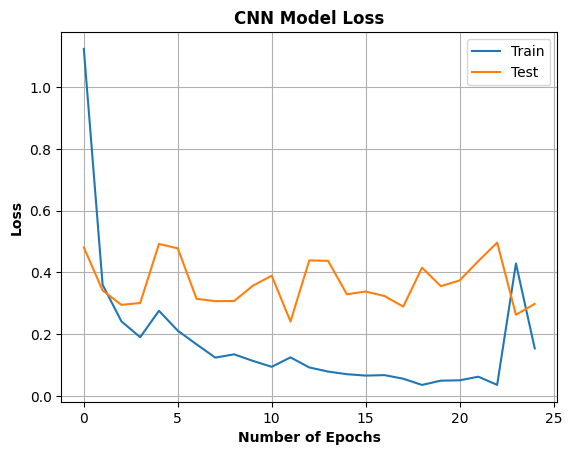

In [ ]:
input_shape=INPUT_SIZE
num_class=15
epochs=25
savepath='/content/drive/MyDrive/Transfer_IDS_IIoT/Trained_Models/generic_cnn.h5'

#Define CNN Model
model = Sequential()
model.add(Conv2D(64,(3,3),strides=(1,1),input_shape=input_shape,padding='same',activation='relu'))
model.add(Conv2D(64,(3,3),strides=(1,1),padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(128,(3,3),strides=(1,1),padding='same',activation='relu'))
model.add(Conv2D(128,(3,3),strides=(1,1),padding='same',activation='relu'))
model.add(GlobalAveragePooling2D())
model.add(Dense(256,activation='relu'))
model.add(Dropout(rate=0.2))
model.add(Dense(num_class,activation='softmax'))
opt = keras.optimizers.Adam(learning_rate=0.0076, beta_1=0.9, beta_2=0.999, epsilon=1e-08)
model.compile(loss='categorical_crossentropy',optimizer=opt,metrics=['accuracy'])

#Model Training
saveBestModel = kcallbacks.ModelCheckpoint(filepath=savepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='auto')
history=model.fit(train_generator,steps_per_epoch=len(train_generator),epochs=epochs,validation_data=validation_generator,
                  validation_steps=len(validation_generator), callbacks=[saveBestModel])

#Plot Training and Testing Accuracies
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('CNN Model Accuracy', fontsize=12, fontweight='bold')
plt.ylabel('Accuracy', fontsize=10, fontweight='bold')
plt.xlabel('Number of Epochs', fontsize=10, fontweight='bold')
plt.legend(['Train', 'Test'], loc='lower right')
plt.grid()
plt.show()

#Plot Training and Testing Loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('CNN Model Loss', fontsize=12, fontweight='bold')
plt.ylabel('Loss', fontsize=10, fontweight='bold')
plt.xlabel('Number of Epochs', fontsize=10, fontweight='bold')
plt.legend(['Train', 'Test'], loc='upper right')
plt.grid()
plt.show()


83683744/83683744 [==============================] - 1s 0us/step
Epoch 1/25
169/169 [==============================] - ETA: 0s - loss: 1.5641 - accuracy: 0.7929
Epoch 1: val_accuracy improved from -inf to 0.81435, saving model to /content/drive/MyDrive/Transfer_IDS_IIoT/Trained_Models/xception.h5
169/169 [==============================] - 62s 304ms/step - loss: 1.5641 - accuracy: 0.7929 - val_loss: 1.6222 - val_accuracy: 0.8143
Epoch 2/25
169/169 [==============================] - ETA: 0s - loss: 0.3721 - accuracy: 0.8677
Epoch 2: val_accuracy improved from 0.81435 to 0.87648, saving model to /content/drive/MyDrive/Transfer_IDS_IIoT/Trained_Models/xception.h5
169/169 [==============================] - 36s 210ms/step - loss: 0.3721 - accuracy: 0.8677 - val_loss: 0.6997 - val_accuracy: 0.8765
Epoch 3/25
169/169 [==============================] - ETA: 0s - loss: 0.2682 - accuracy: 0.8978
Epoch 3: val_accuracy improved from 0.87648 to 0.94601, saving model to /content/drive/MyDrive/Transfe

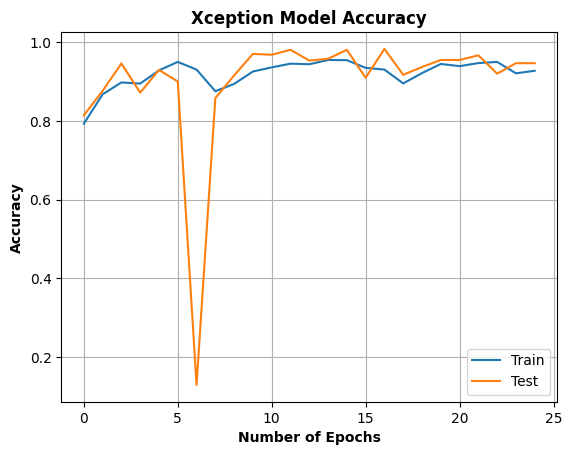

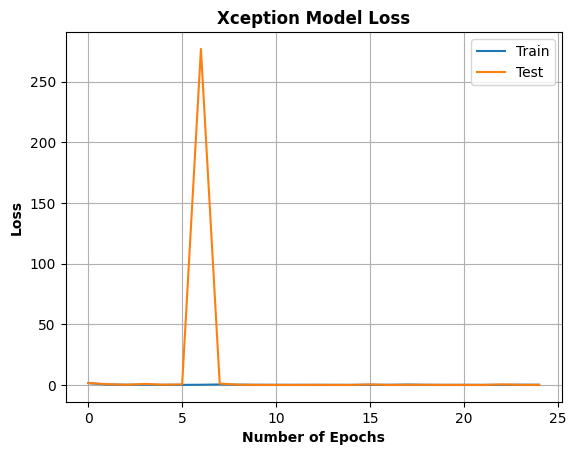

In [ ]:
input_shape=INPUT_SIZE
num_class=15
epochs=25


savepath='/content/drive/MyDrive/Transfer_IDS_IIoT/Trained_Models/xception.h5'

#Define Xception Model
model_fine_tune = Xception(include_top=False, weights='imagenet', input_shape=input_shape)
for layer in model_fine_tune.layers[:120]:
    layer.trainable = False
for layer in model_fine_tune.layers[120:]:
    layer.trainable = True
model = GlobalAveragePooling2D()(model_fine_tune.output)
model=Dense(units=128,activation='relu')(model)
model=Dropout(0.3)(model)
model = Dense(num_class, activation='softmax')(model)
model = Model(model_fine_tune.input, model, name='xception')
opt = keras.optimizers.Adam(learning_rate=0.06, beta_1=0.9, beta_2=0.999, epsilon=1e-08)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

#Model Training
saveBestModel = kcallbacks.ModelCheckpoint(filepath=savepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='auto')
history=model.fit(train_generator,steps_per_epoch=len(train_generator),epochs=epochs,validation_data=validation_generator,
                  validation_steps=len(validation_generator), callbacks=[saveBestModel])

#Plot Training and Testing Accuracies
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Xception Model Accuracy', fontsize=12, fontweight='bold')
plt.ylabel('Accuracy', fontsize=10, fontweight='bold')
plt.xlabel('Number of Epochs', fontsize=10, fontweight='bold')
plt.legend(['Train', 'Test'], loc='lower right')
plt.grid()
plt.show()

#Plot Training and Testing Loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Xception Model Loss', fontsize=12, fontweight='bold')
plt.ylabel('Loss', fontsize=10, fontweight='bold')
plt.xlabel('Number of Epochs', fontsize=10, fontweight='bold')
plt.legend(['Train', 'Test'], loc='upper right')
plt.grid()
plt.show()

58889256/58889256 [==============================] - 0s 0us/step
Epoch 1/25
169/169 [==============================] - ETA: 0s - loss: 0.6936 - accuracy: 0.8227
Epoch 1: val_accuracy improved from -inf to 0.91124, saving model to /content/drive/MyDrive/Transfer_IDS_IIoT/Trained_Models/VGG16.h5
169/169 [==============================] - 41s 215ms/step - loss: 0.6936 - accuracy: 0.8227 - val_loss: 0.2357 - val_accuracy: 0.9112
Epoch 2/25
169/169 [==============================] - ETA: 0s - loss: 0.3604 - accuracy: 0.8706
Epoch 2: val_accuracy improved from 0.91124 to 0.92086, saving model to /content/drive/MyDrive/Transfer_IDS_IIoT/Trained_Models/VGG16.h5
169/169 [==============================] - 32s 189ms/step - loss: 0.3604 - accuracy: 0.8706 - val_loss: 0.2330 - val_accuracy: 0.9209
Epoch 3/25
169/169 [==============================] - ETA: 0s - loss: 0.4545 - accuracy: 0.8424
Epoch 3: val_accuracy did not improve from 0.92086
169/169 [==============================] - 30s 175ms/step

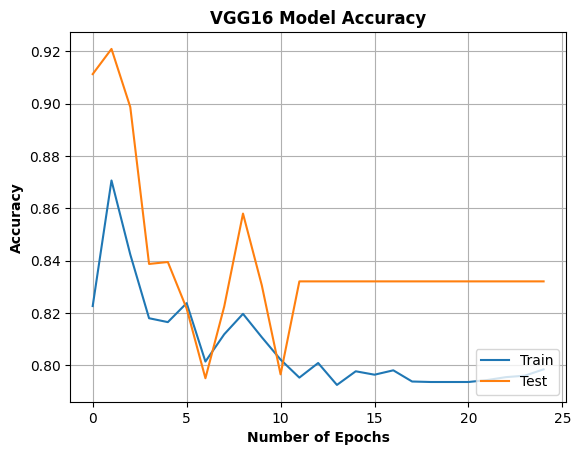

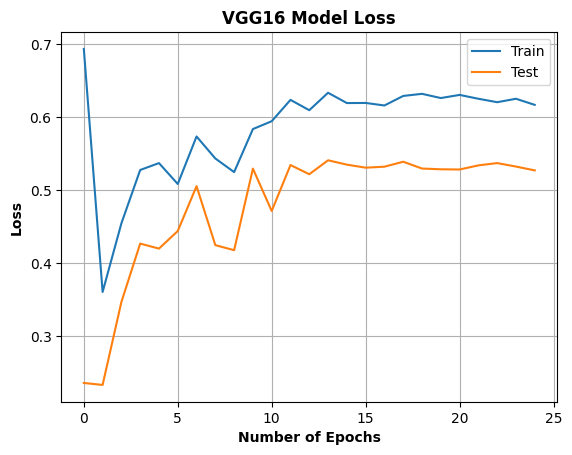

In [ ]:
input_shape=INPUT_SIZE
num_class=15
epochs=25
savepath='/content/drive/MyDrive/Transfer_IDS_IIoT/Trained_Models/VGG16.h5'

#Define VGG16 Model
model_fine_tune = VGG16(include_top=False, weights='imagenet', input_shape=input_shape)
for layer in model_fine_tune.layers[:30]:
    layer.trainable = False
for layer in model_fine_tune.layers[30:]:
    layer.trainable = True
model = GlobalAveragePooling2D()(model_fine_tune.output)
model=Dense(units=256,activation='relu')(model)
model=Dropout(0.2)(model)
model = Dense(num_class, activation='softmax')(model)
model = Model(model_fine_tune.input, model, name='vgg')
opt = keras.optimizers.Adam(learning_rate=0.056, beta_1=0.9, beta_2=0.999, epsilon=1e-08)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

#Model Training
saveBestModel = kcallbacks.ModelCheckpoint(filepath=savepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='auto')
history=model.fit(train_generator,steps_per_epoch=len(train_generator),epochs=epochs,validation_data=validation_generator,
                  validation_steps=len(validation_generator), callbacks=[saveBestModel])

#Plot Training and Testing Accuracies
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('VGG16 Model Accuracy', fontsize=12, fontweight='bold')
plt.ylabel('Accuracy', fontsize=10, fontweight='bold')
plt.xlabel('Number of Epochs', fontsize=10, fontweight='bold')
plt.legend(['Train', 'Test'], loc='lower right')
plt.grid()
plt.show()

#Plot Training and Testing Loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('VGG16 Model Loss', fontsize=12, fontweight='bold')
plt.ylabel('Loss', fontsize=10, fontweight='bold')
plt.xlabel('Number of Epochs', fontsize=10, fontweight='bold')
plt.legend(['Train', 'Test'], loc='upper right')
plt.grid()
plt.show()

80134624/80134624 [==============================] - 1s 0us/step
Epoch 1/25
169/169 [==============================] - ETA: 0s - loss: 0.5543 - accuracy: 0.8535
Epoch 1: val_accuracy improved from -inf to 0.93861, saving model to /content/drive/MyDrive/Transfer_IDS_IIoT/Trained_Models/VGG19.h5
169/169 [==============================] - 44s 253ms/step - loss: 0.5543 - accuracy: 0.8535 - val_loss: 0.2275 - val_accuracy: 0.9386
Epoch 2/25
169/169 [==============================] - ETA: 0s - loss: 0.1731 - accuracy: 0.9532
Epoch 2: val_accuracy improved from 0.93861 to 0.96080, saving model to /content/drive/MyDrive/Transfer_IDS_IIoT/Trained_Models/VGG19.h5
169/169 [==============================] - 34s 202ms/step - loss: 0.1731 - accuracy: 0.9532 - val_loss: 0.1053 - val_accuracy: 0.9608
Epoch 3/25
169/169 [==============================] - ETA: 0s - loss: 0.0991 - accuracy: 0.9703
Epoch 3: val_accuracy improved from 0.96080 to 0.97115, saving model to /content/drive/MyDrive/Transfer_IDS_

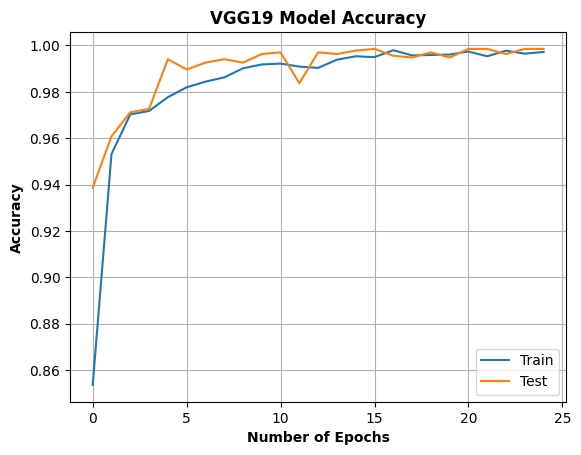

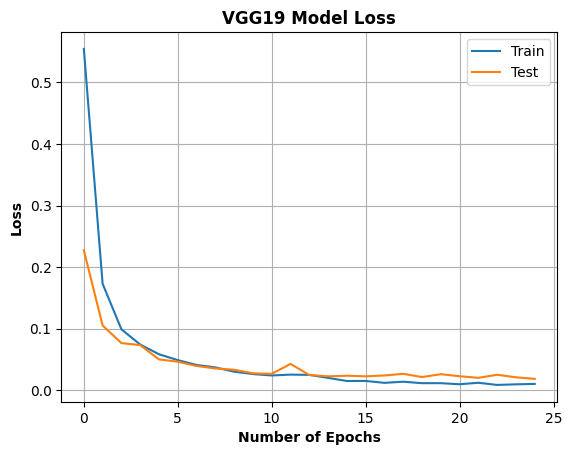

In [ ]:
input_shape=INPUT_SIZE
num_class=15
epochs=25
savepath='/content/drive/MyDrive/Transfer_IDS_IIoT/Trained_Models/VGG19.h5'

#Define VGG19 Model
model_fine_tune = VGG19(include_top=False, weights='imagenet', input_shape=input_shape)
for layer in model_fine_tune.layers[:40]:
    layer.trainable = False
for layer in model_fine_tune.layers[40:]:
    layer.trainable = True
model = GlobalAveragePooling2D()(model_fine_tune.output)
model = Dense(units=128,activation='relu')(model)
model = Dropout(0.3)(model)
model = Dense(num_class, activation='softmax')(model)
model = Model(model_fine_tune.input, model, name='vgg')
opt = keras.optimizers.Adam(learning_rate=0.002, beta_1=0.9, beta_2=0.999, epsilon=1e-08)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

#Model Training
saveBestModel = kcallbacks.ModelCheckpoint(filepath=savepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='auto')
history=model.fit(train_generator,steps_per_epoch=len(train_generator),epochs=epochs,validation_data=validation_generator,
                  validation_steps=len(validation_generator), callbacks=[saveBestModel])

#Plot Training and Testing Accuracies
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('VGG19 Model Accuracy', fontsize=12, fontweight='bold')
plt.ylabel('Accuracy', fontsize=10, fontweight='bold')
plt.xlabel('Number of Epochs', fontsize=10, fontweight='bold')
plt.legend(['Train', 'Test'], loc='lower right')
plt.grid()
plt.show()

#Plot Training and Testing Loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('VGG19 Model Loss', fontsize=12, fontweight='bold')
plt.ylabel('Loss', fontsize=10, fontweight='bold')
plt.xlabel('Number of Epochs', fontsize=10, fontweight='bold')
plt.legend(['Train', 'Test'], loc='upper right')
plt.grid()
plt.show()

87910968/87910968 [==============================] - 1s 0us/step
Epoch 1/25
169/169 [==============================] - ETA: 0s - loss: 0.2741 - accuracy: 0.9249
Epoch 1: val_accuracy improved from -inf to 0.71450, saving model to /content/drive/MyDrive/Transfer_IDS_IIoT/Trained_Models/inception.h5
169/169 [==============================] - 101s 389ms/step - loss: 0.2741 - accuracy: 0.9249 - val_loss: 85.2684 - val_accuracy: 0.7145
Epoch 2/25
169/169 [==============================] - ETA: 0s - loss: 0.1300 - accuracy: 0.9593
Epoch 2: val_accuracy did not improve from 0.71450
169/169 [==============================] - 37s 221ms/step - loss: 0.1300 - accuracy: 0.9593 - val_loss: 32.9047 - val_accuracy: 0.1013
Epoch 3/25
169/169 [==============================] - ETA: 0s - loss: 0.0466 - accuracy: 0.9874
Epoch 3: val_accuracy improved from 0.71450 to 0.99630, saving model to /content/drive/MyDrive/Transfer_IDS_IIoT/Trained_Models/inception.h5
169/169 [==============================] - 42s

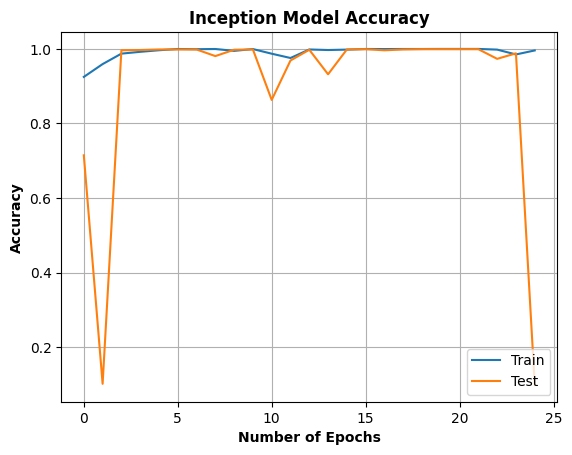

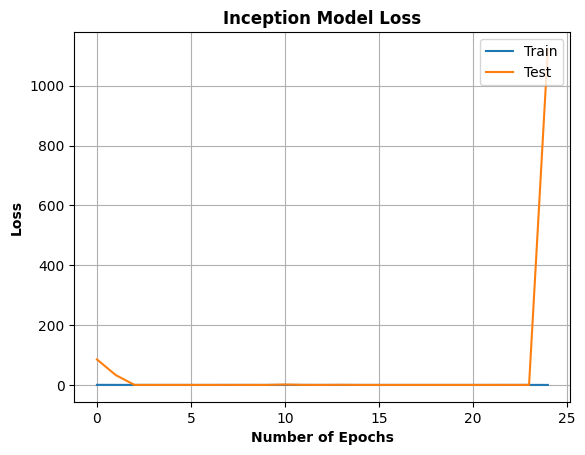

In [ ]:
input_shape=INPUT_SIZE
num_class=15
epochs=25
savepath='/content/drive/MyDrive/Transfer_IDS_IIoT/Trained_Models/inception.h5'

#Define Inception Model
model_fine_tune = InceptionV3(include_top=False, weights='imagenet', input_shape=input_shape)
for layer in model_fine_tune.layers[:65]:
    layer.trainable = False
for layer in model_fine_tune.layers[65:]:
    layer.trainable = True
model = GlobalAveragePooling2D()(model_fine_tune.output)
model=Dense(units=256,activation='relu')(model)
model=Dropout(0.2)(model)
model = Dense(num_class, activation='softmax')(model)
model = Model(model_fine_tune.input, model, name='resnet')
opt = keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

#Model Training
saveBestModel = kcallbacks.ModelCheckpoint(filepath=savepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='auto')
history=model.fit(train_generator,steps_per_epoch=len(train_generator),epochs=epochs,validation_data=validation_generator,
                  validation_steps=len(validation_generator), callbacks=[saveBestModel])

#Plot Training and Testing Accuracies
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Inception Model Accuracy', fontsize=12, fontweight='bold')
plt.ylabel('Accuracy', fontsize=10, fontweight='bold')
plt.xlabel('Number of Epochs', fontsize=10, fontweight='bold')
plt.legend(['Train', 'Test'], loc='lower right')
plt.grid()
plt.show()

#Plot Training and Testing Loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Inception Model Loss', fontsize=12, fontweight='bold')
plt.ylabel('Loss', fontsize=10, fontweight='bold')
plt.xlabel('Number of Epochs', fontsize=10, fontweight='bold')
plt.legend(['Train', 'Test'], loc='upper right')
plt.grid()

Epoch 1/25
169/169 [==============================] - ETA: 0s - loss: 0.2986 - accuracy: 0.9007
Epoch 1: val_accuracy improved from -inf to 0.76036, saving model to /content/drive/MyDrive/Transfer_IDS_IIoT/Trained_Models/inceptionresnetv2.h5
169/169 [==============================] - 119s 429ms/step - loss: 0.2986 - accuracy: 0.9007 - val_loss: 4.9970 - val_accuracy: 0.7604
Epoch 2/25
169/169 [==============================] - ETA: 0s - loss: 0.1128 - accuracy: 0.9532
Epoch 2: val_accuracy did not improve from 0.76036
169/169 [==============================] - 52s 303ms/step - loss: 0.1128 - accuracy: 0.9532 - val_loss: 51.5625 - val_accuracy: 0.1398
Epoch 3/25
169/169 [==============================] - ETA: 0s - loss: 0.1066 - accuracy: 0.9639
Epoch 3: val_accuracy improved from 0.76036 to 0.90089, saving model to /content/drive/MyDrive/Transfer_IDS_IIoT/Trained_Models/inceptionresnetv2.h5
169/169 [==============================] - 63s 373ms/step - loss: 0.1066 - accuracy: 0.9639 - va

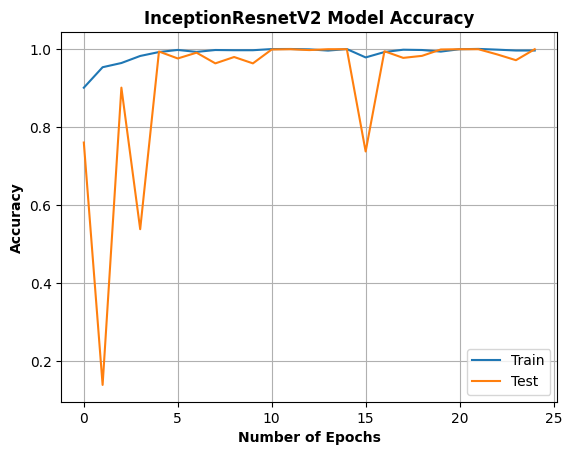

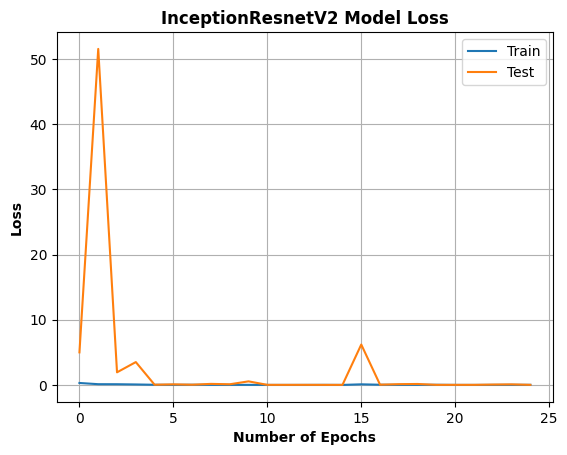

In [ ]:
input_shape=INPUT_SIZE
num_class=15
epochs=25
savepath='/content/drive/MyDrive/Transfer_IDS_IIoT/Trained_Models/inceptionresnetv2.h5'

#Define Inception Resnet V2 Model
model_fine_tune = InceptionResNetV2(include_top=False, weights='imagenet', input_shape=input_shape)
for layer in model_fine_tune.layers[:540]:
    layer.trainable = False
for layer in model_fine_tune.layers[540:]:
    layer.trainable = True
model = GlobalAveragePooling2D()(model_fine_tune.output)
model=Dense(units=256,activation='relu')(model)
model=Dropout(0.2)(model)
model = Dense(num_class, activation='softmax')(model)
model = Model(model_fine_tune.input, model, name='resnet')
opt = keras.optimizers.Adam(learning_rate=0.002, beta_1=0.9, beta_2=0.999, epsilon=1e-08)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

#Model Training
saveBestModel = kcallbacks.ModelCheckpoint(filepath=savepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='auto')
history=model.fit(train_generator,steps_per_epoch=len(train_generator),epochs=epochs,validation_data=validation_generator,
                  validation_steps=len(validation_generator), callbacks=[saveBestModel])

#Plot Training and Testing Accuracies
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('InceptionResnetV2 Model Accuracy', fontsize=12, fontweight='bold')
plt.ylabel('Accuracy', fontsize=10, fontweight='bold')
plt.xlabel('Number of Epochs', fontsize=10, fontweight='bold')
plt.legend(['Train', 'Test'], loc='lower right')
plt.grid()
plt.show()

#Plot Training and Testing Loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('InceptionResnetV2 Model Loss', fontsize=12, fontweight='bold')
plt.ylabel('Loss', fontsize=10, fontweight='bold')
plt.xlabel('Number of Epochs', fontsize=10, fontweight='bold')
plt.legend(['Train', 'Test'], loc='upper right')
plt.grid()


In [ ]:
input_shape=INPUT_SIZE
num_class=15
epochs=25
savepath='/content/drive/MyDrive/Transfer_IDS_IIoT/Trained_Models/efficientnetb7.h5'

#Define EfficientNetB7 Model
model_fine_tune = EfficientNetB7(include_top=False, weights='imagenet', input_shape=input_shape)
for layer in model_fine_tune.layers[:350]:
    layer.trainable = False
for layer in model_fine_tune.layers[350:]:
    layer.trainable = True
model = GlobalAveragePooling2D()(model_fine_tune.output)
model=Dense(units=256,activation='relu')(model)
model=Dropout(0.2)(model)
model = Dense(num_class, activation='softmax')(model)
model = Model(model_fine_tune.input, model, name='efficientnetb7')
opt = keras.optimizers.Adam(learning_rate=0.003, beta_1=0.9, beta_2=0.999, epsilon=1e-08)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

#Model Training
saveBestModel = kcallbacks.ModelCheckpoint(filepath=savepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='auto')
history=model.fit(train_generator,steps_per_epoch=len(train_generator),epochs=epochs,validation_data=validation_generator,
                  validation_steps=len(validation_generator), callbacks=[saveBestModel])

#Plot Training and Testing Accuracies
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('EfficientNetB7 Model Accuracy', fontsize=12, fontweight='bold')
plt.ylabel('Accuracy', fontsize=10, fontweight='bold')
plt.xlabel('Number of Epochs', fontsize=10, fontweight='bold')
plt.legend(['Train', 'Test'], loc='lower right')
plt.grid()
plt.show()

#Plot Training and Testing Loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('EfficientNetB7 Model Loss', fontsize=12, fontweight='bold')
plt.ylabel('Loss', fontsize=10, fontweight='bold')
plt.xlabel('Number of Epochs', fontsize=10, fontweight='bold')
plt.legend(['Train', 'Test'], loc='upper right')
plt.grid()

NameError: name 'INPUT_SIZE' is not defined